#### PROBLEM STATEMENT

    • DOMAIN: Industrial safety. NLP based Chatbot.
    • CONTEXT:

    The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

#### • DATA DESCRIPTION:

    This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

    Columns description:

    ‣ Data: timestamp or time/date information
    ‣ Countries: which country the accident occurred (anonymised)
    ‣ Local: the city where the manufacturing plant is located (anonymised)
    ‣ Industry sector: which sector the plant belongs to
    ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    ‣ Gender: if the person is male of female
    ‣ Employee or Third Party: if the injured person is an employee or a third party
    ‣ Critical Risk: some description of the risk involved in the accident
    ‣ Description: Detailed description of how the accident happened.
    Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing, Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

#### • PROJECT OBJECTIVE:

    Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### • PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]

    1. Milestone 1: [ Duration: 2 weeks, Score: 20 points] 
    ‣ Input: Interim report
    ‣ Process:
        ‣ Step 1: Import the data
        ‣ Step 2: Data cleansing
        ‣ Step 3: Data preprocessing
        ‣ Step 4: Data preparation to be used for AIML model learning
        ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 
    
    2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
    ‣ Input: Output of milestone 1 
    ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
        ‣ Submission: Interim report

    3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
        ‣ Input: Pickled model from milestone 2 
        ‣ Process: [ 15 points ]
        ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ] 
        ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ] 
        ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
        ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers. ‣ Submission: Final report [ 45 points ]
        ‣ Hints:
        ‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
        ‣ To make GUI as a desk app you can use TKINTER library.
        ‣ To make web service GUI you can use FLASK or DJANGO library.

## 1. Milestone 1: 

####  ‣ Input: Interim report
        ‣ Process:
            ‣ Step 1: Import the data
            ‣ Step 2: Data cleansing
            ‣ Step 3: Data preprocessing
            ‣ Step 4: Data preparation to be used for AIML model learning
            ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import word_tokenize

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### ‣ Step 1: Import the data

In [3]:
data=pd.read_csv("/Users/shreekkanthkalyanasundaram/AIML/Capestone/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

#### ‣ Step 2: Data cleansing

#### EDA

In [4]:
data.head(3)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [5]:
data['Data']=pd.to_datetime(data.Data)
data['year']=data['Data'].apply(lambda x : x.year)
data['month']=data['Data'].apply(lambda x : x.month)
data['date']=data['Data'].apply(lambda x : x.day)

In [6]:
data.drop(["Unnamed: 0","Data"], axis=1, inplace=True)

In [7]:
print("Number of rows = {0}\nNumber of Columns = {1} ".format(data.shape[0], data.shape[1]))

Number of rows = 425
Number of Columns = 12 


In [8]:
data['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

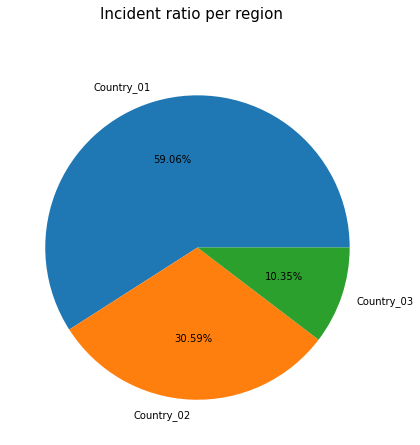

In [9]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Incident ratio per region', fontsize=15)
plt.pie(data['Countries'].value_counts(), labels=['Country_01', 'Country_02','Country_03'], explode=(0,0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
    * Country_01 has more incident records - 59.06% 
    * Country_02 has 30.59% of incident registered for the company
    * Country_03 has 10.35% of records

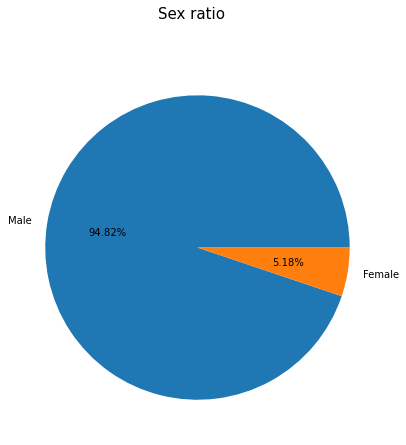

In [10]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Sex ratio', fontsize=15)
plt.pie(data['Genre'].value_counts(), labels=['Male', 'Female'], explode=(0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
    * Female employee is much safer at workplace then the male employee, as only 5.18% are female

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

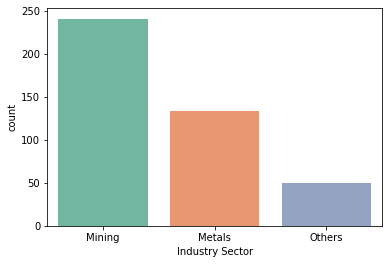

In [11]:
sns.countplot(data=data,x=data['Industry Sector'],palette = "Set2")

#### Inference:
   * Mining industry got more Accident Level then the Metals Industry Sector and others 

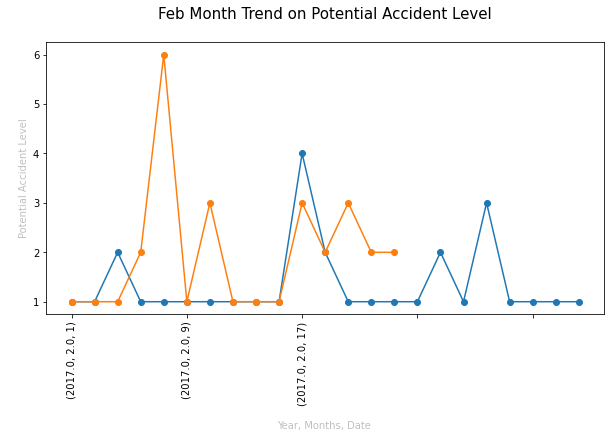

In [12]:
fig,(ax1) = plt.subplots()
ax1.set_title('Feb Month Trend on Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months, Date ').set_color('silver')
plt.ylabel('\nPotential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
    * Per day Potential Accident count level was higher on 2017 Feb month, this shows trend is increase on 2017 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'remains of choco'),
  Text(11, 0, 'Fall prevention (same level)'),
  Text(12, 0, 'Pressurized Systems'),
  Text(13, 0, 'Suspended Loads'),
  Text(14, 0, 'Fall prevention'),
  Text(15, 0, 'Pressurized Systems / Chemical Substances'),
  Text(16, 0, 'Liquid Metal'),
  Text(17, 0, 'Power lock'),
  Text(18, 0, 'Blocking and isolation of energies'),
  Text(19, 0, 'Projection of fragments'),
  Text(20, 0, 'Machine Protection'),
  Text(21, 0, 'Electrical Shock'),
  Text(22, 0, 'Burn'),
  Text(23, 0, 'Plates'),
  Text(24, 0, 'Projection/Burning'),


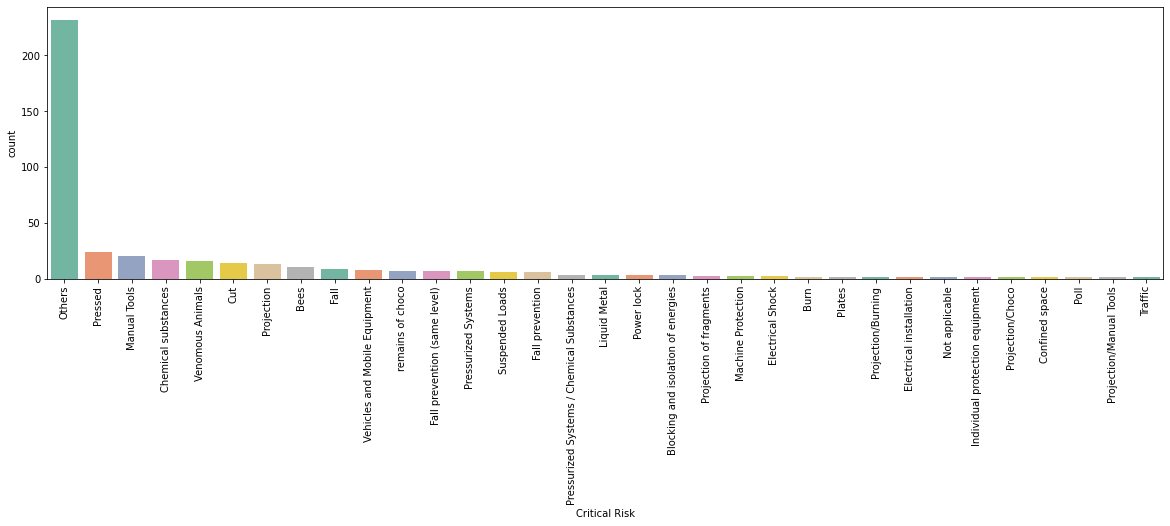

In [13]:
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Critical Risk'],palette = "Set2",order=descending_order)
plt.xticks(rotation = 'vertical')

#### Inference:
    * 232 records are uncategorised risks, followed by 24 records of Pressed issues

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

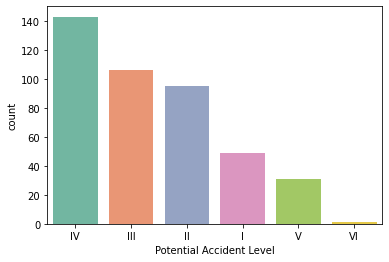

In [14]:
descending_order = data['Potential Accident Level'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Potential Accident Level'],palette = "Set2",order=descending_order)

#### Inference:
    * 33.64 % of risk belongs to Potential Accident Level 3   
    * 24.9 % of risk belongs to Potential Accident Level 2 
    * 22.4 % of risk belongs to Potential Accident Level 1
    * 11.5 % of risk belongs to Potential Accident Level 0
    * 7.3 % of risk belongs to Potential Accident Level 4
    * 0.24 % of risk belongs to Potential Accident Level 5
    
    This shows that we are dealing with bias data

#### Label encoding to convert as numerical values

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['Potential Accident Level']=le.fit_transform(data['Potential Accident Level']).astype(np.int8)
data['Countries']=le.fit_transform(data['Countries']).astype(np.int8)
data['Genre']=le.fit_transform(data['Genre']).astype(np.int8)
data['Employee or Third Party']=le.fit_transform(data['Employee or Third Party']).astype(np.int8)
data['Critical Risk']=le.fit_transform(data['Critical Risk']).astype(np.int8)
data['Accident Level']=le.fit_transform(data['Accident Level']).astype(np.int8)
data['Industry Sector']=le.fit_transform(data['Industry Sector']).astype(np.int8)
data['Local']=le.fit_transform(data['Local']).astype(np.int8)

In [16]:
data.drop_duplicates(inplace=True)
len(data)

418

In [17]:
data.head(2)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,date
0,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,2016,1,2


#### ‣ Step 3: Data preprocessing

Pre-processing: lower case, remove special characters/ numbers, tokenization,lemmatize & removing stop words

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
from tqdm._tqdm_notebook import tqdm_notebook


nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))
tqdm_notebook.pandas()
def preprocess(sentence):
          sentence=str(sentence) 
          corpus=[]
          lem=WordNetLemmatizer()
          words=[w for w in word_tokenize(sentence) if (w not in stop)]         
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
          return " ".join(words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
preprocess("during college days I used to runs to the bus stops")

'college day used run bus stop'

In [20]:
data['cleantext']=data['Description'].progress_map(lambda s:preprocess(s))

  0%|          | 0/418 [00:00<?, ?it/s]

In [21]:
#copying records
data['preprocesstext']=data['cleantext']

In [22]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())

#### words in each Potential Accident Levels


Potential Accident Level:  0


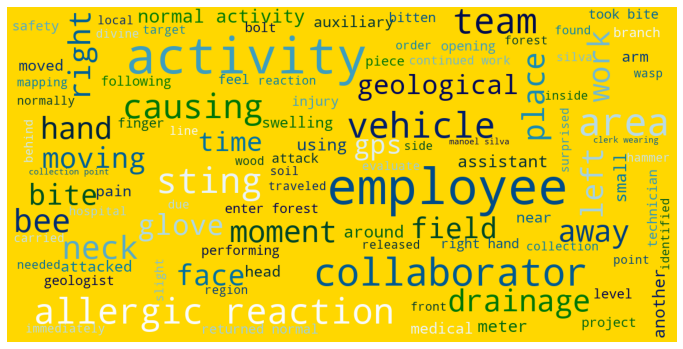

dict_keys(['activity', 'employee', 'area', 'collaborator', 'team', 'vehicle', 'sting', 'allergic reaction', 'causing', 'neck', 'bee', 'hand', 'right', 'work', 'left', 'drainage', 'away', 'place', 'moment', 'field', 'moving', 'bite', 'face', 'glove', 'time', 'gps', 'geological', 'normal activity', 'around', 'using', 'small', 'another', 'assistant', 'meter', 'arm', 'swelling', 'pain', 'near', 'attacked', 'head', 'medical', 'moved', 'auxiliary', 'project', 'level', 'bitten', 'injury', 'feel', 'opening', 'technician', 'performing', 'branch', 'attack', 'finger', 'piece', 'safety', 'bolt', 'geologist', 'following', 'right hand', 'took bite', 'enter forest', 'returned normal', 'target', 'inside', 'wasp', 'local', 'front', 'slight', 'region', 'due', 'soil', 'needed', 'found', 'line', 'normally', 'reaction', 'immediately', 'collection', 'point', 'behind', 'silva', 'surprised', 'wood', 'hospital', 'released', 'evaluate', 'order', 'side', 'mapping', 'hammer', 'carried', 'traveled', 'identified', 

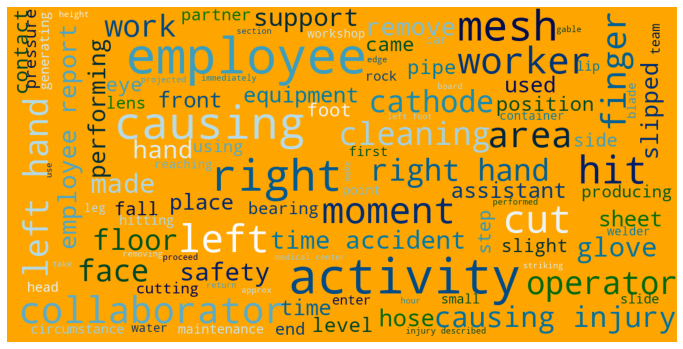

dict_keys(['employee', 'activity', 'causing', 'right', 'mesh', 'hit', 'cut', 'left', 'collaborator', 'worker', 'moment', 'area', 'finger', 'left hand', 'cleaning', 'operator', 'cathode', 'face', 'work', 'right hand', 'floor', 'causing injury', 'made', 'glove', 'hand', 'safety', 'remove', 'support', 'employee report', 'time accident', 'slipped', 'performing', 'hose', 'assistant', 'sheet', 'place', 'time', 'equipment', 'front', 'used', 'position', 'level', 'contact', 'came', 'eye', 'pipe', 'side', 'step', 'fall', 'foot', 'slight', 'producing', 'partner', 'using', 'pressure', 'end', 'lens', 'bearing', 'cutting', 'generating', 'first', 'maintenance', 'team', 'circumstance', 'head', 'point', 'enter', 'lip', 'slide', 'hitting', 'rock', 'small', 'reaching', 'container', 'leg', 'welder', 'water', 'workshop', 'car', 'blade', 'injury described', 'left foot', 'medical center', 'immediately', 'performed', 'take', 'removing', 'approx', 'hour', 'section', 'striking', 'proceed', 'gable', 'projected',

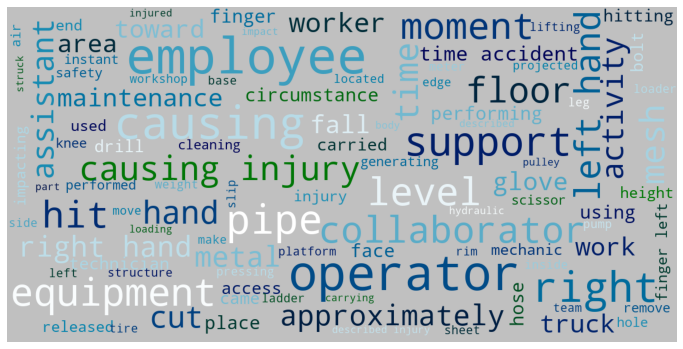

dict_keys(['employee', 'operator', 'causing', 'right', 'pipe', 'support', 'level', 'equipment', 'collaborator', 'moment', 'hit', 'floor', 'left hand', 'time', 'mesh', 'causing injury', 'hand', 'assistant', 'cut', 'activity', 'approximately', 'metal', 'right hand', 'worker', 'maintenance', 'fall', 'work', 'toward', 'area', 'glove', 'truck', 'time accident', 'finger', 'place', 'performing', 'hose', 'circumstance', 'face', 'using', 'access', 'came', 'carried', 'drill', 'bolt', 'hitting', 'technician', 'injury', 'mechanic', 'used', 'released', 'end', 'impacting', 'height', 'finger left', 'generating', 'performed', 'knee', 'remove', 'instant', 'cleaning', 'hole', 'air', 'scissor', 'safety', 'lifting', 'left', 'slip', 'tire', 'loader', 'platform', 'make', 'structure', 'leg', 'base', 'projected', 'pressing', 'move', 'rim', 'side', 'meter', 'weight', 'team', 'edge', 'sheet', 'inside', 'workshop', 'ladder', 'located', 'pump', 'described injury', 'pulley', 'struck', 'injured', 'hydraulic', 'impa

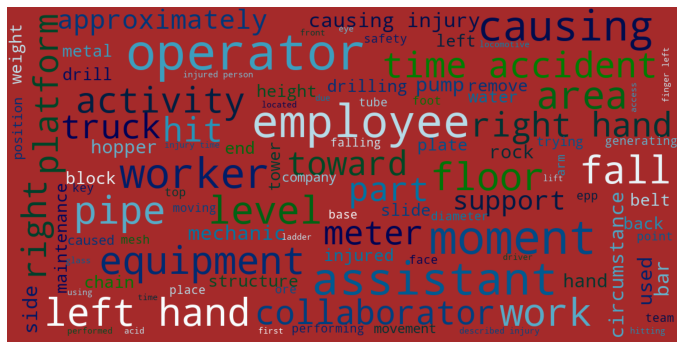

dict_keys(['operator', 'moment', 'employee', 'assistant', 'causing', 'worker', 'fall', 'left hand', 'floor', 'pipe', 'equipment', 'work', 'area', 'level', 'time accident', 'activity', 'collaborator', 'right', 'hit', 'platform', 'toward', 'right hand', 'part', 'meter', 'truck', 'approximately', 'support', 'causing injury', 'used', 'pump', 'bar', 'circumstance', 'mechanic', 'side', 'rock', 'hand', 'hopper', 'height', 'end', 'injured', 'drilling', 'plate', 'drill', 'structure', 'block', 'weight', 'left', 'belt', 'back', 'remove', 'maintenance', 'slide', 'water', 'metal', 'chain', 'tower', 'company', 'trying', 'position', 'movement', 'caused', 'performing', 'point', 'foot', 'falling', 'epp', 'tube', 'safety', 'ore', 'team', 'generating', 'face', 'moving', 'arm', 'key', 'base', 'top', 'diameter', 'place', 'mesh', 'described injury', 'finger left', 'injured person', 'access', 'driver', 'lift', 'time', 'using', 'locomotive', 'performed', 'due', 'ladder', 'acid', 'hitting', 'injury time', 'fro

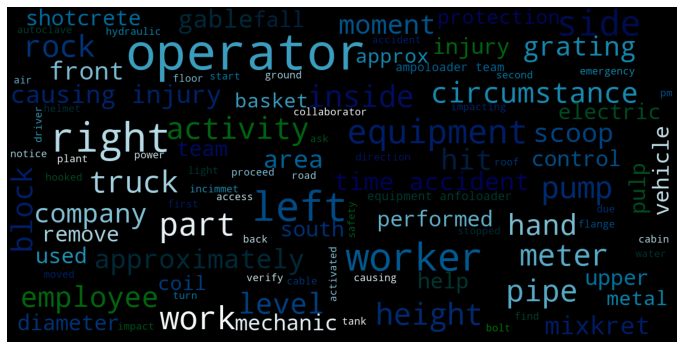

dict_keys(['operator', 'left', 'right', 'worker', 'side', 'equipment', 'part', 'work', 'meter', 'rock', 'pump', 'pipe', 'activity', 'height', 'inside', 'truck', 'employee', 'circumstance', 'level', 'block', 'hit', 'hand', 'approximately', 'moment', 'company', 'scoop', 'grating', 'mixkret', 'front', 'gable', 'area', 'causing injury', 'time accident', 'shotcrete', 'help', 'performed', 'pulp', 'injury', 'upper', 'south', 'control', 'team', 'electric', 'mechanic', 'vehicle', 'fall', 'remove', 'used', 'diameter', 'protection', 'metal', 'approx', 'basket', 'coil', 'equipment anfoloader', 'ampoloader team', 'pm', 'due', 'water', 'roof', 'moved', 'verify', 'ask', 'emergency', 'activated', 'collaborator', 'accident', 'flange', 'bolt', 'causing', 'air', 'first', 'incimmet', 'direction', 'plant', 'light', 'start', 'cabin', 'turn', 'cable', 'power', 'floor', 'driver', 'find', 'notice', 'stopped', 'road', 'hydraulic', 'hooked', 'second', 'access', 'back', 'impacting', 'safety', 'autoclave', 'tank',

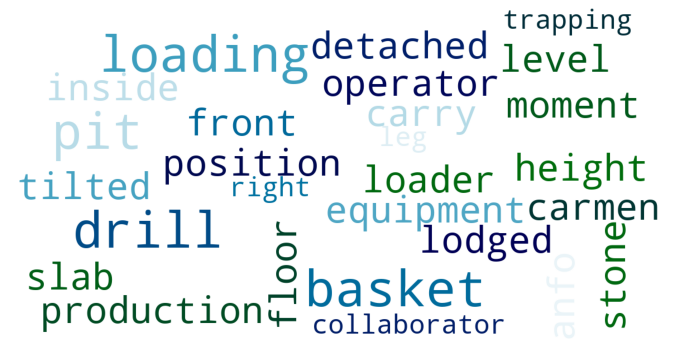

dict_keys(['loading', 'drill', 'pit', 'basket', 'process', 'carmen', 'level', 'operator', 'position', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'production', 'moment', 'stone', 'slab', 'detached', 'front', 'tilted', 'lodged', 'inside', 'trapping', 'right', 'leg', 'collaborator'])


In [23]:
#function call for word cloud & print each Potential Accident Level words

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
#         corpus.append(data['cleantext'][j]) 
       corpus= ' '.join([data['preprocesstext'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

#### Remove common words from Description

In [24]:
#generate corpus for each potential accident level categories
for i in range(0, 6):
    cleancorpus=[]
    for j in data[data['Potential Accident Level']==i].index:
        cleancorpus=' '.join([data['cleantext'][j],str(cleancorpus)])
#         cleancorpus.append(data['cleantext'][j].lower()) 
    cleancorpus = word_tokenize(str(cleancorpus))  #[2:-2] is to remove front and trailer char [' ']
    (globals()[f"cleanwords_{i}"])=cleancorpus


In [25]:
#function to get the common words per Potential Accident Level
def cleancommon_words(a,b,c,d,e,f):
  union_corpus = set.union(set(a),set(b),set(c),set(d),set(e))
  intersection_corpus = set.intersection(set(union_corpus),set(f))
  k=set(intersection_corpus)
  return k
  
cleancommon_wordlist0=list(cleancommon_words(cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_0))
cleancommon_wordlist1=list(cleancommon_words(cleanwords_0,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_1))
cleancommon_wordlist2=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_2))
cleancommon_wordlist3=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_4,cleanwords_5,cleanwords_3))
cleancommon_wordlist4=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_5,cleanwords_4))
cleancommon_wordlist5=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5))

In [26]:
# print(cleanwords_0) #sample
print(cleanwords_5) #sample

['during', 'process', 'loading', 'drill', 'carmen', 'pit', 'level', 'operator', 'position', 'basket', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'basket', 'trapping', 'right', 'leg', 'collaborator', '[', ']']


In [27]:
data['Potential Accident Level'].value_counts()

3    141
2    106
1     95
0     45
4     30
5      1
Name: Potential Accident Level, dtype: int64

In [28]:
#generate corpus for each potential accident level categories
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()


def clean_preprocess(sentence,class_stopwords):   
    sentence=str(sentence)
    words = tokenizer.tokenize(sentence)           # tokenization only the word characters
#     words = [spell.correction(w) for w in words]
#     words = [lemmatizer.lemmatize(w) for w in words]
    words = [w for w in words if w not in class_stopwords]
    return " ".join(words)

In [29]:
#generate corpus for each potential accident level categories
from tqdm import tqdm

for i in range(0, 6):
    cleancorpus=[]
    cleancommon=(globals()[f"cleancommon_wordlist{i}"])
    for j in tqdm(data[data['Potential Accident Level']==i].index):
         data['cleantext'][j]=clean_preprocess(data['cleantext'][j],cleancommon)

100%|██████████| 1/1 [00:00<00:00, 2933.08it/s]


#### Unique words in each Potential Accident Levels


Potential Accident Level:  0


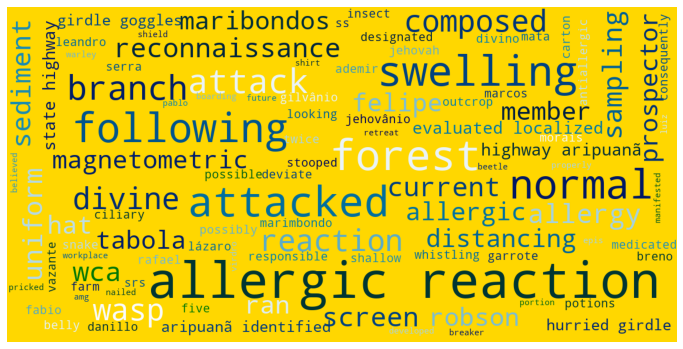

dict_keys(['allergic reaction', 'swelling', 'attacked', 'forest', 'normal', 'following', 'branch', 'attack', 'wasp', 'reaction', 'composed', 'divine', 'reconnaissance', 'sampling', 'uniform', 'allergy', 'wca', 'current', 'sediment', 'screen', 'magnetometric', 'member', 'robson', 'hat', 'maribondos', 'allergic', 'ran', 'tabola', 'felipe', 'prospector', 'distancing', 'evaluated localized', 'state highway', 'highway aripuanã', 'aripuanã identified', 'hurried girdle', 'girdle goggles', 'possibly', 'potions', 'insect', 'responsible', 'fabio', 'rafael', 'danillo', 'gilvânio', 'antiallergic', 'designated', 'twice', 'medicated', 'marcos', 'stooped', 'deviate', 'whistling', 'ademir', 'five', 'vazante', 'mata', 'serra', 'garrote', 'srs', 'leandro', 'jehovânio', 'shallow', 'carton', 'possible', 'looking', 'ss', 'breno', 'consequently', 'belly', 'jehovah', 'farm', 'lázaro', 'divino', 'morais', 'ciliary', 'outcrop', 'snake', 'marimbondo', 'amg', 'luiz', 'boarding', 'believed', 'nailed', 'properly',

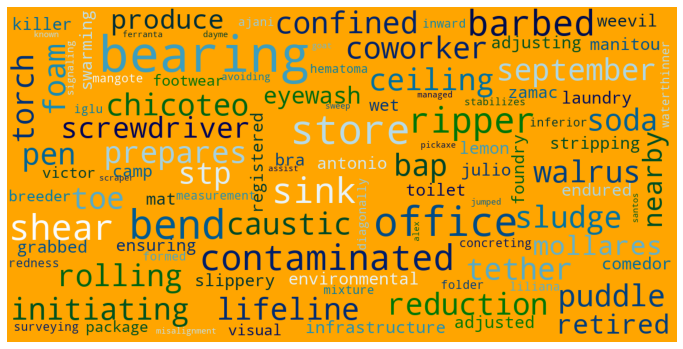

dict_keys(['bearing', 'office', 'store', 'bend', 'barbed', 'contaminated', 'sink', 'shear', 'ripper', 'tether', 'lifeline', 'toe', 'chicoteo', 'rolling', 'prepares', 'reduction', 'walrus', 'foam', 'bap', 'caustic', 'soda', 'initiating', 'ceiling', 'september', 'sludge', 'stp', 'coworker', 'puddle', 'torch', 'pen', 'confined', 'screwdriver', 'produce', 'retired', 'mollares', 'nearby', 'eyewash', 'camp', 'grabbed', 'laundry', 'stripping', 'environmental', 'swarming', 'weevil', 'endured', 'infrastructure', 'julio', 'toilet', 'bra', 'comedor', 'lemon', 'adjusted', 'registered', 'killer', 'manitou', 'ensuring', 'mat', 'wet', 'slippery', 'antonio', 'adjusting', 'foundry', 'zamac', 'package', 'footwear', 'victor', 'visual', 'breeder', 'surveying', 'measurement', 'concreting', 'mangote', 'inferior', 'hematoma', 'waterthinner', 'mixture', 'redness', 'formed', 'ajani', 'liliana', 'folder', 'iglu', 'diagonally', 'inward', 'stabilizes', 'avoiding', 'signaling', 'misalignment', 'scraper', 'santos',

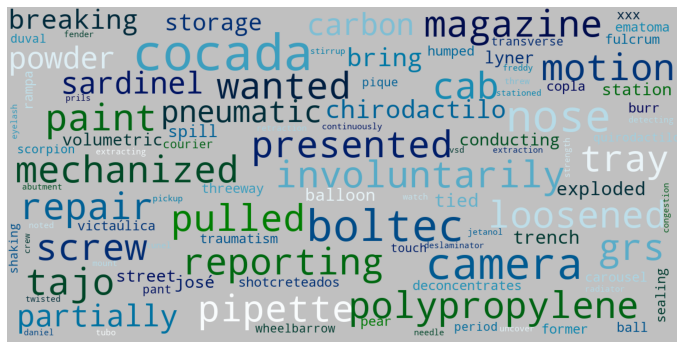

dict_keys(['cocada', 'boltec', 'nose', 'camera', 'magazine', 'presented', 'tray', 'pipette', 'grs', 'motion', 'screw', 'involuntarily', 'paint', 'polypropylene', 'pulled', 'wanted', 'reporting', 'cab', 'tajo', 'mechanized', 'repair', 'loosened', 'pneumatic', 'partially', 'powder', 'sardinel', 'carbon', 'breaking', 'chirodactilo', 'bring', 'storage', 'exploded', 'trench', 'tied', 'conducting', 'station', 'spill', 'street', 'josé', 'lyner', 'volumetric', 'balloon', 'rampa', 'xxx', 'carousel', 'deconcentrates', 'victaúlica', 'copla', 'former', 'ematoma', 'threeway', 'pear', 'sealing', 'fulcrum', 'traumatism', 'shotcreteados', 'ball', 'humped', 'burr', 'quirodactilo', 'duval', 'courier', 'pique', 'transverse', 'wheelbarrow', 'shaking', 'pant', 'scorpion', 'touch', 'period', 'continuously', 'extracting', 'vsd', 'freddy', 'mount', 'pickup', 'daniel', 'strength', 'threw', 'eyelash', 'needle', 'retraction', 'twisted', 'tunel', 'stationed', 'abutment', 'stirrup', 'noted', 'watch', 'extraction',

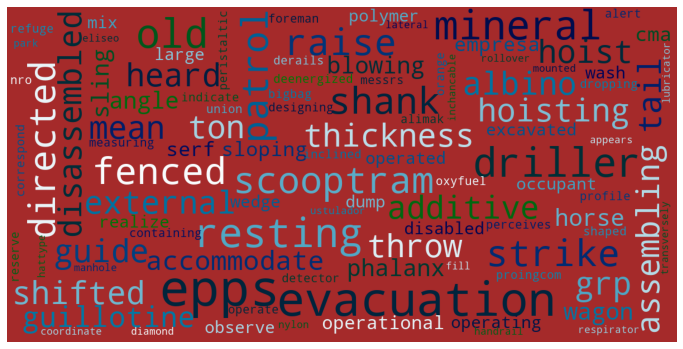

dict_keys(['epps', 'evacuation', 'driller', 'old', 'mineral', 'resting', 'directed', 'fenced', 'scooptram', 'raise', 'strike', 'shank', 'patrol', 'assembling', 'ton', 'additive', 'shifted', 'guide', 'tail', 'heard', 'albino', 'thickness', 'disassembled', 'external', 'throw', 'mean', 'hoisting', 'hoist', 'grp', 'guillotine', 'accommodate', 'blowing', 'phalanx', 'horse', 'sling', 'angle', 'wagon', 'sloping', 'empresa', 'serf', 'cma', 'operational', 'excavated', 'occupant', 'dump', 'large', 'wash', 'operated', 'observe', 'wedge', 'mix', 'realize', 'polymer', 'operating', 'disabled', 'deenergized', 'profile', 'oxyfuel', 'proingcom', 'foreman', 'indicate', 'refuge', 'orange', 'alert', 'detector', 'correspond', 'containing', 'bigbag', 'perceives', 'shaped', 'measuring', 'nro', 'alimak', 'dropping', 'peristaltic', 'reserve', 'operate', 'designing', 'derails', 'messrs', 'inclined', 'union', 'respirator', 'ustulador', 'transversely', 'park', 'fill', 'appears', 'manhole', 'inchancable', 'rollove

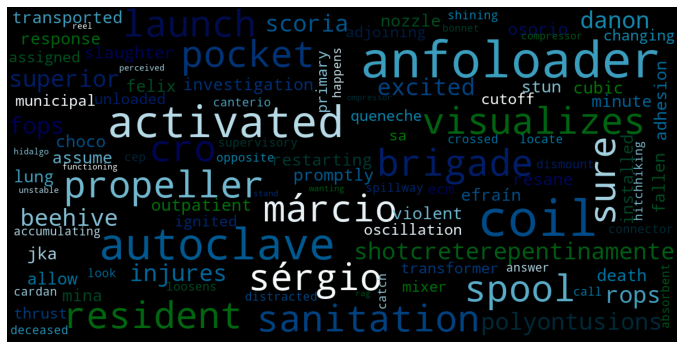

dict_keys(['anfoloader', 'coil', 'activated', 'autoclave', 'launch', 'brigade', 'márcio', 'sérgio', 'spool', 'pocket', 'sanitation', 'cro', 'visualizes', 'propeller', 'sure', 'resident', 'shotcreterepentinamente', 'superior', 'injures', 'rops', 'fops', 'polyontusions', 'scoria', 'beehive', 'excited', 'danon', 'resane', 'cubic', 'minute', 'allow', 'adhesion', 'restarting', 'assume', 'fallen', 'response', 'death', 'investigation', 'efraín', 'osorio', 'felix', 'mina', 'installed', 'nozzle', 'lung', 'violent', 'stun', 'slaughter', 'choco', 'jka', 'promptly', 'transported', 'outpatient', 'municipal', 'mixer', 'ecm', 'sa', 'transformer', 'oscillation', 'queneche', 'adjoining', 'assigned', 'changing', 'primary', 'cutoff', 'unloaded', 'ignited', 'thrust', 'accumulating', 'dismount', 'look', 'shining', 'deceased', 'supervisory', 'locate', 'answer', 'call', 'distracted', 'happens', 'hitchhiking', 'cep', 'crossed', 'canterio', 'catch', 'opposite', 'loosens', 'cardan', 'connector', 'spillway', 'ab

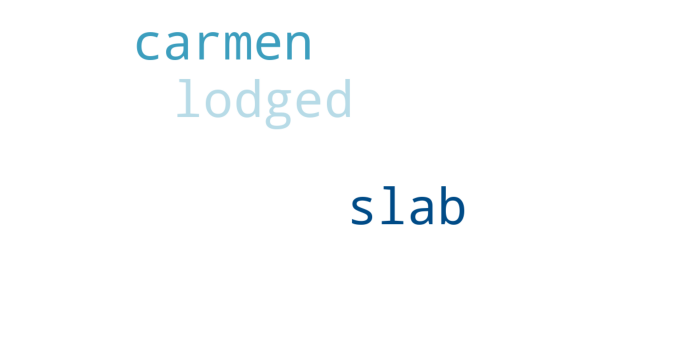

dict_keys(['carmen', 'slab', 'lodged'])


In [30]:
#function call for word cloud & print the unique words on each class (Potential Accident Level)

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
#         corpus.append(data['cleantext'][j]) 
       corpus= ' '.join([data['cleantext'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

In [31]:
import random
for x in [1,2]:
    i=random.randint(0,len(data))
    print("Potential Accident Level: ",data['Potential Accident Level'][i])
    print("---"*10)
    print(" ")
    print("Given:\n ",data['Description'][i])
    print(" ")
    print("preprocessed:\n ",data['preprocesstext'][i])
    print(" ")
    print("Unique words:\n ",data['cleantext'][i])
    print("===="*25,"\n")

Potential Accident Level:  0
------------------------------
 
Given:
  During the execution of the soil sampling task, in the Potions area, around 3:00 pm Pablo was moving on the bite and was bitten by a right elbow wasp over the sleeve uniform. He was using at the time of the incident all the PPE needed for the activity. The employee was evaluated by the team who found it to be a mild injury with localized swelling. The employee reported that he did not feel any pain and that he could continue the activity.
 
preprocessed:
  during execution soil sampling task potions area around pablo moving bite bitten right elbow wasp sleeve uniform using time incident ppe needed activity the employee evaluated team found mild injury localized swelling the employee reported feel pain could continue activity
 
Unique words:
  sampling potions pablo wasp uniform evaluated localized swelling

Potential Accident Level:  1
------------------------------
 
Given:
  At the end of the concreting activity, 

#### word frequency count/ percentage

In [32]:
corpuslen=0
for i in data['cleantext']:
    corpuslen+=len(str(i).split())
print("corpus word frequency: ",corpuslen) 

#word frequency
for i in range(0,6):  
   corpus=[]
   documentlen=0
   for j in data[data['Potential Accident Level']==i].index:
        corpus.append(data['preprocesstext'][j])   
   documentlen=len(str(corpus).split())
   print('\nPercentage word share of Potential Accident Level',i ,"- {:.2f}".format((documentlen/corpuslen)*100),"%")


corpus word frequency:  2085

Percentage word share of Potential Accident Level 0 - 84.99 %

Percentage word share of Potential Accident Level 1 - 123.21 %

Percentage word share of Potential Accident Level 2 - 139.81 %

Percentage word share of Potential Accident Level 3 - 250.22 %

Percentage word share of Potential Accident Level 4 - 57.41 %

Percentage word share of Potential Accident Level 5 - 1.58 %


#### Step 4: Data preparation to be used for AIML model learning

##### Tokenizer
Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences.

In [33]:
import re
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [34]:
all_words = list()
for comp in data['preprocesstext']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [35]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 2744


In [36]:
all_words[-10:-1]

['immediately',
 'grabbed',
 'laundry',
 'table',
 'avoid',
 'falling',
 'floor',
 'suffering',
 'described']

In [37]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [38]:
# For Data Preprocessing
import pandas as pd

# Gensim Libraries
import gensim
from gensim.models.word2vec import Word2Vec

# For visualization of word2vec model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data['preprocessed_text']=data['preprocesstext'].apply(gensim.utils.simple_preprocess)

In [40]:
preprocessed_text = data['preprocesstext'].apply(gensim.utils.simple_preprocess)
preprocessed_text

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
420    [being, approximately, am, approximately, lift...
421    [the, collaborator, moved, infrastructure, off...
422    [during, environmental, monitoring, activity, ...
423    [the, employee, performed, activity, stripping...
424    [am, assistant, cleaned, floor, module, centra...
Name: preprocesstext, Length: 418, dtype: object

In [41]:
num_1=[]
for a_string in data['preprocesstext']:
    word_list = a_string.split()
    number_of_words = len(word_list)
    num_1.append(number_of_words)

max(num_1)

95

In [42]:
num_features=95
min_word_count=1
num_workers=2
window_size=3
subsampling=1e-3

In [43]:
model = Word2Vec(preprocessed_text,workers=num_workers,sg=1,min_count=min_word_count,window=window_size,sample=subsampling)

In [44]:
model.init_sims(replace=True)  #training

In [45]:
model_name = "my_domain_specific_word2vec_model"

In [46]:
model.save(model_name)

In [47]:
# Word Embeddings are numeric vector representations of text that also maintain the semantic and contextual relationships within the words in the text corpus.

In [48]:
from gensim.models.word2vec import Word2Vec
model_name = "my_domain_specific_word2vec_model"
model = Word2Vec.load(model_name)

In [49]:
# Check dimension of word vectors
model.vector_size

100

In [50]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model.wv[word] for word in all_words if word in model.wv.key_to_index]

# # Create a list of the words corresponding to these vectors
words_filtered = [word for word in all_words if word in model.wv.key_to_index]

# # Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# # Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
while,-0.058769,0.130680,0.027665,0.009004,0.028103,-0.153283,0.034964,0.286402,-0.054920,-0.04404,...,0.153600,0.053150,-0.000355,0.069237,0.162730,0.166575,0.043821,-0.180037,0.044832,0.003684
removing,-0.079797,0.115126,0.010541,0.009389,0.015164,-0.185454,0.039085,0.265596,-0.052732,-0.07876,...,0.163834,0.046960,0.007509,0.078409,0.173986,0.134973,0.056863,-0.179099,0.045742,-0.004441
drill,-0.068388,0.102426,0.004959,0.010536,0.006575,-0.181248,0.049562,0.263749,-0.050199,-0.06642,...,0.149711,0.058095,0.015489,0.070316,0.167440,0.141147,0.051362,-0.185838,0.061454,0.001160


#### Dimensionality Reduction with t-SNE

In [51]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])


In [52]:
# pip install adjustText

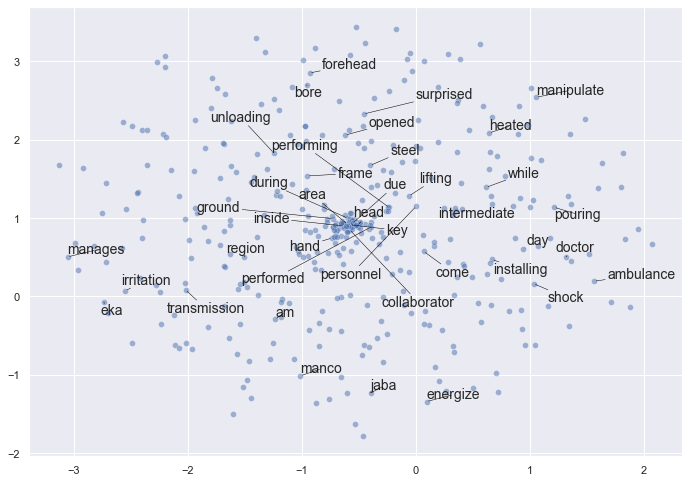

In [53]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

#### Inference:
     plot shows words are in clustered at centre [head,due,hand,area,during,inside] 
     few words [ambulance,energize, eka, irritation] are scattered across which will be the key words to help in predicitons
     

In [54]:
size=100
model.wv['environmental'].reshape((1, size))

array([[-0.02085516, -0.05296078,  0.00886483,  0.02551133,  0.13787623,
        -0.14657165,  0.11241623,  0.09004693,  0.11583582, -0.00280312,
        -0.13551636,  0.01445762,  0.03806361, -0.09353887,  0.17178287,
         0.00874713,  0.04047252,  0.08942682,  0.01576057, -0.04555299,
         0.18446992, -0.06510133,  0.00043891, -0.1307119 , -0.09607497,
        -0.14288776, -0.02230197,  0.07878292, -0.18715462,  0.16133288,
        -0.03304642,  0.08869118,  0.01649095, -0.1100787 , -0.1864346 ,
         0.05128469,  0.01154747,  0.06787378, -0.20651838, -0.06257652,
         0.06403276, -0.16064027,  0.08553339,  0.14266112,  0.10338971,
        -0.01605302, -0.20528427, -0.0640418 ,  0.03062935,  0.1642304 ,
        -0.07650509, -0.21015562,  0.05829301,  0.1238751 ,  0.0445621 ,
        -0.04792131, -0.05354361, -0.08260608, -0.1666436 , -0.10798147,
        -0.04178757,  0.09519573,  0.06999268, -0.05565453, -0.00031696,
        -0.10135644, -0.06185013, -0.02817913,  0.0

In [55]:
def document_vector(word2vec_model, words):
    # remove out-of-vocabulary words
#     doc = [word for word in words if word in model.wv.key_to_index]
#     print("===",np.mean(model.wv[words], axis=0))
#     print("===",np.mean(model.wv[doc], axis=0))
    return np.mean(model.wv[words], axis=0)

In [56]:
x = []
for words in data['preprocessed_text']: # append the vector for each document
    x.append(document_vector(model, words))
data_list = np.array(x) # list to array

In [57]:
data_list.shape

(418, 100)

In [58]:
data_list=pd.DataFrame(data_list)
data_1=pd.concat([data.reset_index(drop=True), data_list.reset_index(drop=True)], axis=1)
# data = pd.c

In [59]:
data_1.head(2)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,2016,...,0.138175,0.047482,0.013772,0.074031,0.171236,0.144717,0.053051,-0.175704,0.052196,-0.002391
1,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,2016,...,0.127352,0.031651,0.016297,0.072605,0.148429,0.137967,0.043110,-0.151318,0.059595,0.000590


In [60]:
data_1.head(1)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,2016,...,0.138175,0.047482,0.013772,0.074031,0.171236,0.144717,0.053051,-0.175704,0.052196,-0.002391


In [61]:
data_1.drop(["Description","cleantext","preprocesstext","preprocessed_text"], axis=1, inplace=True)

In [62]:
# data_1['Potential Accident Level']=le.fit_transform(data['Potential Accident Level']).astype(np.int8)
data_1['Countries']=le.fit_transform(data['Countries']).astype(np.int8)
data_1['Genre']=le.fit_transform(data['Genre']).astype(np.int8)
data_1['Employee or Third Party']=le.fit_transform(data['Employee or Third Party']).astype(np.int8)
data_1['Critical Risk']=le.fit_transform(data['Critical Risk']).astype(np.int8)
data_1['Accident Level']=le.fit_transform(data['Accident Level']).astype(np.int8)
data_1['Industry Sector']=le.fit_transform(data['Industry Sector']).astype(np.int8)
data_1['Local']=le.fit_transform(data['Local']).astype(np.int8)

In [63]:
pd.options.display.float_format = "{:,.2f}".format # float values to 2 decimal values

## 2. Milestone 2: 
    ‣ Input: Output of milestone 
    1 ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
    ‣ Output: Pickled model to be used for future prediction
    ‣ Submission: Interim report

## Machine learning classifiers

#### train-test split

In [64]:
Y = data_1['Potential Accident Level']
X = data_1.drop(['Potential Accident Level'], axis=1) 

In [65]:
Y.value_counts()

3    141
2    106
1     95
0     45
4     30
5      1
Name: Potential Accident Level, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0},)'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0},)'.format(Y_test.shape[0]))

X_train shape : (334,110)
Y_train shape : (334,)
X_test shape : (84,110)
Y_test shape : (84,)


####      Perform relevant sequence adding on the data

In [68]:
#padding
# limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0) using the pad_sequences() function in Keras?
from tensorflow.keras.preprocessing import sequence  #Pads sequences to the same length


max_review_length = 150
X_train = sequence.pad_sequences(X_train.values.tolist(), maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test.values.tolist(), maxlen=max_review_length)

## LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
pred = regression_model.predict(X_test)
pred = [round(x) for x in pred]
print(accuracy_score(Y_test,pred))
print('Confusion matrix:', confusion_matrix(Y_test,pred))
print('Classification report:',classification_report(Y_test,pred))

0.38095238095238093
Confusion matrix: [[ 1  6  2  0  0]
 [ 0  2 14  1  0]
 [ 0  1 22  4  0]
 [ 0  0 19  5  2]
 [ 0  0  1  2  2]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.22      0.12      0.15        17
           2       0.38      0.81      0.52        27
           3       0.42      0.19      0.26        26
           4       0.50      0.40      0.44         5

    accuracy                           0.38        84
   macro avg       0.50      0.33      0.32        84
weighted avg       0.43      0.38      0.33        84



#### Model output:
          Overall 38% Accuracy. This can't be used as a predictive model 
    

## LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train,Y_train)
pred = LogisticRegression_model.predict(X_test)
print(accuracy_score(Y_test,pred))
print('Confusion matrix:', confusion_matrix(Y_test,pred))
print('Classification report:',classification_report(Y_test,pred))

0.32142857142857145
Confusion matrix: [[ 4  1  2  1  1]
 [ 1  3  5  8  0]
 [ 0  5  7 15  0]
 [ 3  4  6 13  0]
 [ 0  1  0  4  0]]
Classification report:               precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.21      0.18      0.19        17
           2       0.35      0.26      0.30        27
           3       0.32      0.50      0.39        26
           4       0.00      0.00      0.00         5

    accuracy                           0.32        84
   macro avg       0.28      0.28      0.27        84
weighted avg       0.31      0.32      0.31        84



#### Model output:
          Overall 32% Accuracy. This can't be used as a predictive model 

In [71]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print(accuracy_score(Y_test,pred))
print('Confusion matrix:', confusion_matrix(Y_test,pred))
print('Classification report:',classification_report(Y_test,pred))

0.36904761904761907
Confusion matrix: [[ 0  0  1  8  0]
 [ 0  4  4  9  0]
 [ 0  2  4 21  0]
 [ 0  0  3 23  0]
 [ 0  0  0  5  0]]
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.67      0.24      0.35        17
           2       0.33      0.15      0.21        27
           3       0.35      0.88      0.50        26
           4       0.00      0.00      0.00         5

    accuracy                           0.37        84
   macro avg       0.27      0.25      0.21        84
weighted avg       0.35      0.37      0.29        84



#### Model output:
          Overall 37% Accuracy. This can't be used as a predictive model 

## RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print(accuracy_score(Y_test,pred))
print('Confusion matrix:', confusion_matrix(Y_test,pred))
print('Classification report:',classification_report(Y_test,pred))

0.4880952380952381
Confusion matrix: [[ 5  3  1  0  0]
 [ 1 11  1  4  0]
 [ 0  7  5 15  0]
 [ 1  1  4 19  1]
 [ 0  0  0  4  1]]
Classification report:               precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.50      0.65      0.56        17
           2       0.45      0.19      0.26        27
           3       0.45      0.73      0.56        26
           4       0.50      0.20      0.29         5

    accuracy                           0.49        84
   macro avg       0.52      0.46      0.46        84
weighted avg       0.49      0.49      0.46        84



#### Model output:
          Overall 49% Accuracy. This is better then the other 3 models

## Neural networks classifiers

In [73]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [74]:
# we will train our model with only top 10000 common words and rest will be excluded 
word_count = 2744 
max_words = 2744
max_len = 32     # max length per sentence
embedding_dim = 100

In [75]:
# create model 

model = tf.keras.Sequential([
    # add an embedding layer
    tf.keras.layers.Embedding(word_count, embedding_dim, trainable=False),
    
    # add the bi-lstm layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    
    # add another bi-lstm layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    # add dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2),
    
    # add a dense layer
    tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
    
    # add the prediction layer
    tf.keras.layers.Dense(2, activation = tf.keras.activations.sigmoid),
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         274400    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          34048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 408,034
Trainable params: 133,634
Non-trainable params: 274,400
____________________________________________

In [76]:
# define a callback function to stop training when thrshold is reached

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > threshold:
            self.model.stop_training = True
            print(' \n Terminating training as model reached ' + str(threshold * 100) + ' % accuracy \n')

callback_func = myCallback()

In [77]:
train_seq = np.asarray(X_train)
validation_seq = np.asarray(X_test)

train_label = Y_train
validation_label = Y_test
#post padding - add 0 to later part of sentence
pad_type = 'post' 
trunc_type = 'post'

max_len=150
batch_size = 50  #50 per batch

In [78]:
# padd the sentence sequence for equal length

train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_seq, padding = pad_type, truncating = trunc_type, maxlen = max_len)
validation_padded = tf.keras.preprocessing.sequence.pad_sequences(validation_seq, padding  = pad_type, truncating = trunc_type, maxlen = max_len)

In [79]:
# history = model.fit(train_padded, train_label, validation_data=(validation_padded, validation_label), epochs = 10, batch_size=batch_size, callbacks = [callback_func], verbose=1)

## ANN

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [111]:
# disable keras warnings
tf.get_logger().setLevel('ERROR')

In [112]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

In [113]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

In [118]:
#     - earlystopping to 100 that stop training once the model performance stops improving on a hold out validation dataset
#     - epochs as 1000 - earlystopping is in place
#     - each batch of size 128

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)



In [119]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
# rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, Y_test), callbacks=[es])

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>